# Detectarea cancerului de san - regresie logistica - by tool and by my code

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from LogisticRegression import MyLogisticRegression
import matplotlib.pyplot as plt
import utils

### Pasul 1 - plot pt distributia datelor

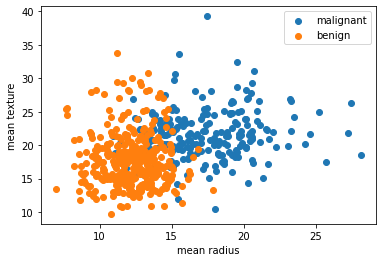

In [2]:
data = load_breast_cancer()
inputs = data['data']
outputs = data['target']
outputNames = data['target_names']
featureNames = list(data['feature_names'])
feature1 = [feat[featureNames.index('mean radius')] for feat in inputs]
feature2 = [feat[featureNames.index('mean texture')] for feat in inputs]
inputs = [[feat[featureNames.index('mean radius')], feat[featureNames.index('mean texture')]] for feat in inputs]

labels = set(outputs)
noData = len(inputs)
for crtLabel in labels:
    x = [feature1[i] for i in range(noData) if outputs[i] == crtLabel ]
    y = [feature2[i] for i in range(noData) if outputs[i] == crtLabel ]
    plt.scatter(x, y, label = outputNames[crtLabel])
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()

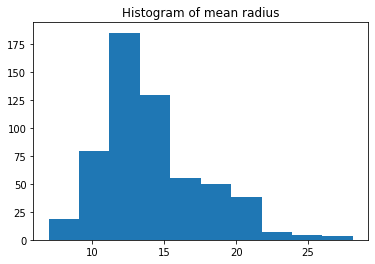

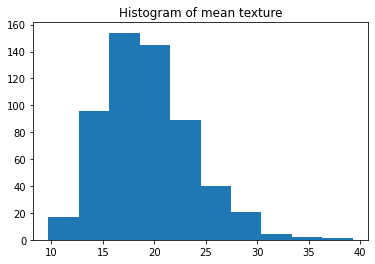

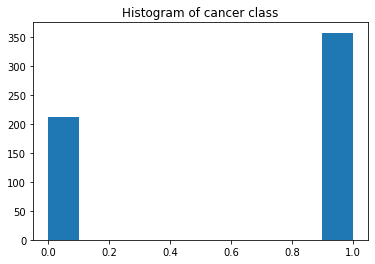

In [3]:
# plot the data distribution
utils.plot_data_histograms(feature1, 'mean radius')
utils.plot_data_histograms(feature2, 'mean texture')
utils.plot_data_histograms(outputs, 'cancer class')

### Pasul 2 - impartire date pe train si test si normalizare

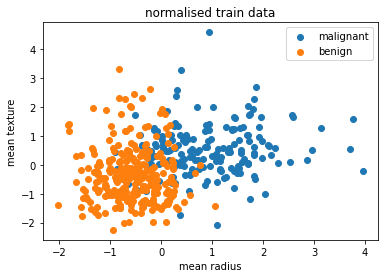

In [4]:
# split data into train and test subsets
train_inputs, train_outputs, validation_inputs, validation_outputs = utils.split_data_into_training_and_validation(inputs, outputs, 0.8)

# normalise the features
train_inputs, validation_inputs = utils.normalisation(train_inputs, validation_inputs)

# plot the normalised data
feature1train = [ex[0] for ex in train_inputs]
feature2train = [ex[1] for ex in train_inputs]
feature1test = [ex[0] for ex in validation_inputs]
feature2test = [ex[1] for ex in validation_inputs]
utils.plotClassificationData(feature1train, feature2train, train_outputs, outputNames, 'normalised train data')

### Pasul 3 - invatare model (cu tool si cod propriu)

In [5]:
# identify (by training) the classifier

# using sklearn
classifier_tool = linear_model.LogisticRegression()

# using developed code
# model initialisation
classifier = MyLogisticRegression()

# train the classifier (fit in on the training data)
classifier_tool.fit(train_inputs, train_outputs)
classifier.fit(train_inputs, train_outputs)

# parameters of the liniar regressor
w0, w1, w2 = classifier_tool.intercept_[0], classifier_tool.coef_[0][0], classifier_tool.coef_[0][1]
print('The learnt model - by tool:')
print('f(x1, x2) = ', w0, '+', w1, '* x1 +', w2, '* x2')
w0, w1, w2 = classifier.intercept_[0], classifier.coef_[0][0], classifier.coef_[0][1]
print('The learnt model - my code:')
print('f(x1, x2) = ', w0, '+', w1, '* x1 +', w2, '* x2')

The learnt model - by tool:
f(x1, x2) =  0.564293012432318 + -3.1851662430494225 * x1 + -0.8418983857102925 * x2
The learnt model - my code:
f(x1, x2) =  0.5641216216389535 + -3.5951150327980117 * x1 + -0.9022413802132988 * x2


### Pasul 4 - plot rezultate (model invatat, predictii)

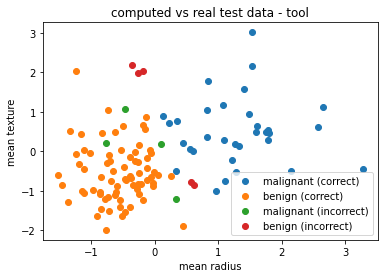

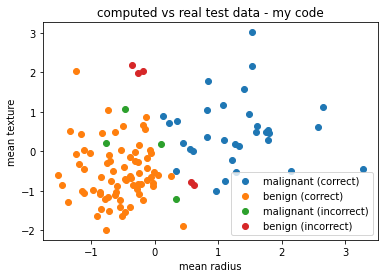

In [6]:
# predict using the classifier
computed_validation_outputs_tool = classifier_tool.predict(validation_inputs)
computed_validation_outputs = classifier.predict(validation_inputs)

# plot a comparison between the real and the computed data
utils.plot_predictions(feature1test, feature2test, validation_outputs, computed_validation_outputs_tool, 'computed vs real test data - tool', outputNames)
utils.plot_predictions(feature1test, feature2test, validation_outputs, computed_validation_outputs, 'computed vs real test data - my code', outputNames)

#### Pasul 5 - calcul metricii de performanta si a loss-ului

In [7]:
# calculate the accuracy
accuracy = accuracy_score(validation_outputs, computed_validation_outputs_tool)
print('Accuracy - by tool:', accuracy)
accuracy = accuracy_score(validation_outputs, computed_validation_outputs)
print('Accuracy - my code:', accuracy)

Accuracy - by tool: 0.9210526315789473
Accuracy - my code: 0.9210526315789473
